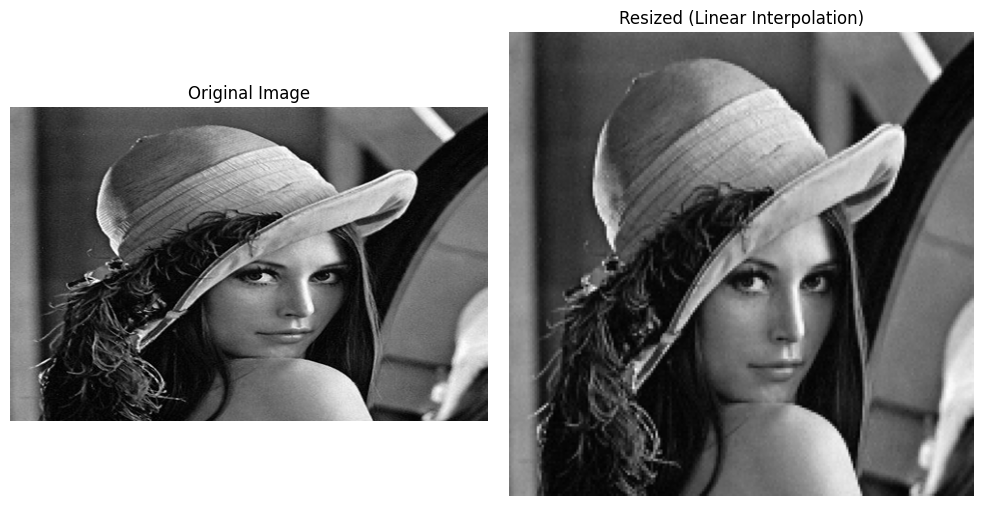

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image (change the path accordingly)
image_path = "/content/photo advanced computer.png"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Resize dimensions
new_size = (200, 200)

# Resize using Linear Interpolation
resized_linear = cv2.resize(image, new_size, interpolation=cv2.INTER_LINEAR)

# Display the original and resized images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Resized Image (Linear Interpolation)
plt.subplot(1, 2, 2)
plt.imshow(resized_linear, cmap="gray")
plt.title("Resized (Linear Interpolation)")
plt.axis("off")

plt.tight_layout()
plt.show()


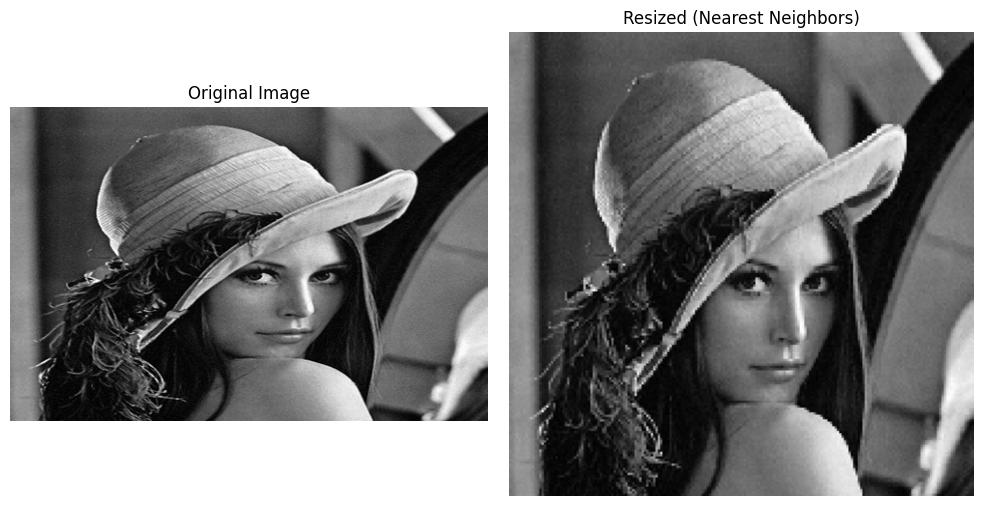

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Resize dimensions
new_size = (200, 200)

# Resize using Nearest Neighbors Interpolation
resized_nearest = cv2.resize(image, new_size, interpolation=cv2.INTER_NEAREST)

# Display the original and resized images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Resized Image (Nearest Neighbors)
plt.subplot(1, 2, 2)
plt.imshow(resized_nearest, cmap="gray")
plt.title("Resized (Nearest Neighbors)")
plt.axis("off")

plt.tight_layout()
plt.show()


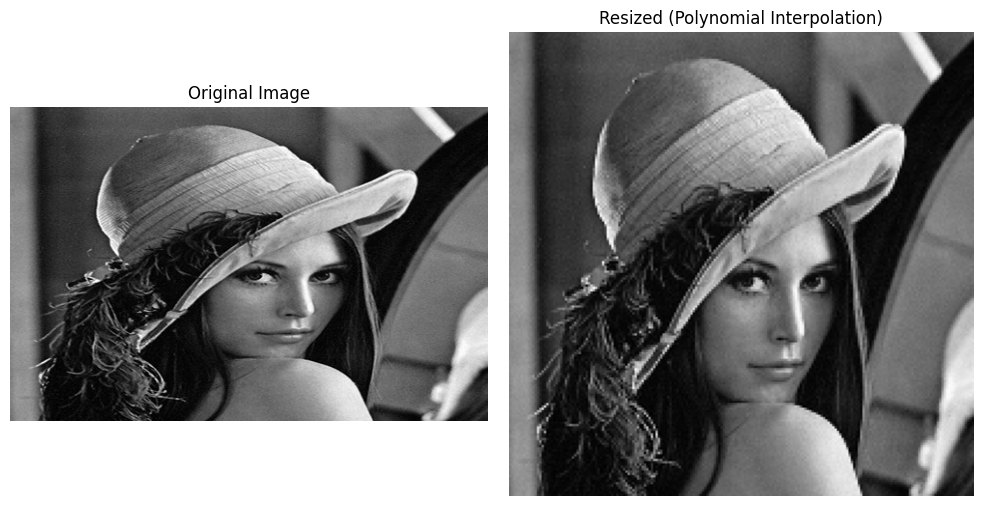

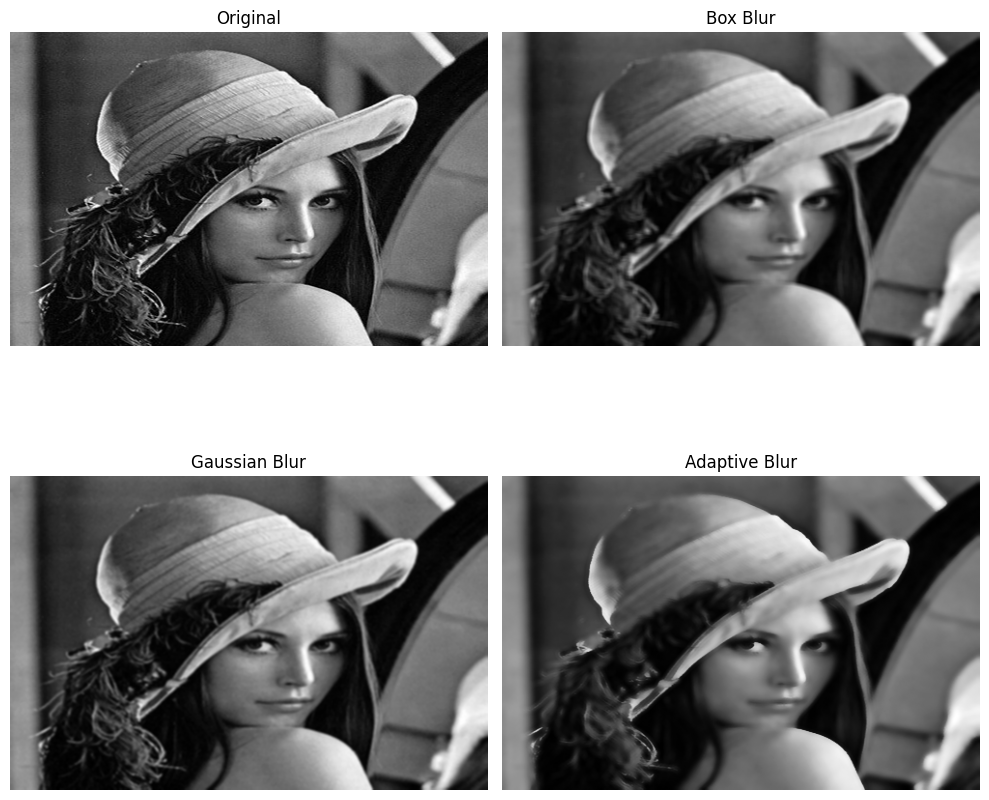

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image (change the path accordingly)
image_path = "/content/photo advanced computer.png"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Apply different blurring techniques
box_blur = cv2.blur(image, (5, 5))  # Box Blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)  # Gaussian Blur
adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)  # Adaptive Bilateral Blur

# Display the results
plt.figure(figsize=(10, 10))

titles = ["Original", "Box Blur", "Gaussian Blur", "Adaptive Blur"]
images = [image, box_blur, gaussian_blur, adaptive_blur]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract features and labels
X, y = mnist.data, mnist.target.astype(np.uint8)  # Convert labels to integers

# Print dataset shape
print(f"Feature Matrix Shape: {X.shape}")  # (70000, 784) -> 70,000 images, each 28x28 pixels (flattened)
print(f"Label Vector Shape: {y.shape}")    # (70000,)

# Display first 5 labels
print("First 5 labels:", y[:5])

# Split dataset into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Fold Cross Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the models: Naive Bayes and SVM
nb_model = GaussianNB()
svm_model = SVC(kernel='linear', random_state=42)

# Initialize lists to store accuracies
nb_accuracies = []
svm_accuracies = []

Feature Matrix Shape: (70000, 784)
Label Vector Shape: (70000,)
First 5 labels: 0    5
1    0
2    4
3    1
4    9
Name: class, dtype: uint8


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract features and labels
X, y = mnist.data, mnist.target.astype(np.uint8)  # Convert labels to integers

# Use a smaller subset of the data (10% of the dataset)
X_sub, _, y_sub, _ = train_test_split(X, y, train_size=0.1, random_state=42)

# Split subset into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42)

# K-Fold Cross Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the models: Decision Tree and Neural Network
dt_model = DecisionTreeClassifier(random_state=42)
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Initialize lists to store accuracies
dt_accuracies = []
nn_accuracies = []

# Cross-validation loop
for train_index, val_index in kf.split(X_train):
    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train and evaluate Decision Tree
    dt_model.fit(X_train_fold, y_train_fold)
    y_val_pred_dt = dt_model.predict(X_val_fold)
    dt_accuracy = accuracy_score(y_val_fold, y_val_pred_dt)
    dt_accuracies.append(dt_accuracy)

    # Train and evaluate Neural Network
    nn_model.fit(X_train_fold, y_train_fold)
    y_val_pred_nn = nn_model.predict(X_val_fold)
    nn_accuracy = accuracy_score(y_val_fold, y_val_pred_nn)
    nn_accuracies.append(nn_accuracy)

# Calculate the average accuracy for both models
avg_dt_accuracy = np.mean(dt_accuracies)
avg_nn_accuracy = np.mean(nn_accuracies)

# Print the results
print(f"Average accuracy for Decision Tree: {avg_dt_accuracy:.4f}")
print(f"Average accuracy for Neural Network: {avg_nn_accuracy:.4f}")


Average accuracy for Decision Tree: 0.7650
Average accuracy for Neural Network: 0.8893


Decision Tree Accuracy:
Accuracy for DecisionTreeClassifier: 0.8642

Decision Tree Metrics:

Precision for DecisionTreeClassifier: 0.8643
Recall for DecisionTreeClassifier: 0.8642
F-Measure for DecisionTreeClassifier: 0.8642
Confusion Matrix for DecisionTreeClassifier:
[[1022    0   11    6   12   24   15    4   23    9]
 [   1 1223    7    9    2    6    4    8    9    5]
 [  16   18  926   27   18   11   15   22   32   21]
 [   8    8   33  958    8   45    6   14   32   32]
 [   3    4   26    6  939   13   17   12   23   61]
 [  16   14   11   55   12  852   26    6   27   20]
 [  10   10   11   12   19   30  969    6   24    5]
 [   4   11   30   17   16    7    3 1037    5   19]
 [  13   16   20   48   24   35   25   14  858   37]
 [   7    4    3   18   40   31    3   31   40  895]]


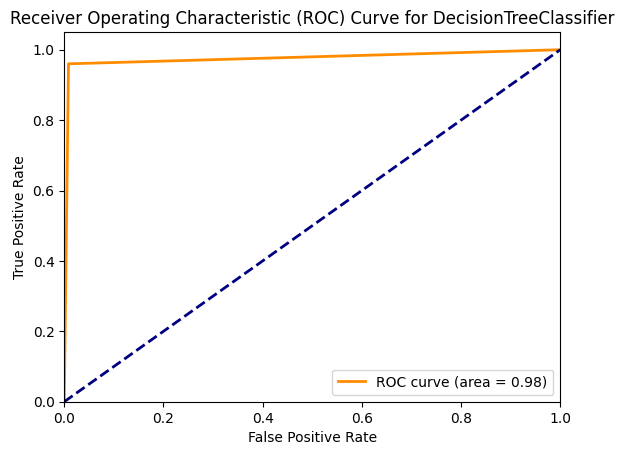


Neural Network Accuracy:
Accuracy for MLPClassifier: 0.9595

Neural Network Metrics:

Precision for MLPClassifier: 0.9597
Recall for MLPClassifier: 0.9595
F-Measure for MLPClassifier: 0.9594
Confusion Matrix for MLPClassifier:
[[1110    0    2    0    2    3    1    0    7    1]
 [   0 1262    3    1    2    0    0    2    4    0]
 [  11   11 1064    3    4    0    2    1    8    2]
 [   2    1   17 1062    2   36    0    8   11    5]
 [   1    2    4    0 1080    1    4    4    0    8]
 [   5    2    3    6    1  996    8    5    7    6]
 [  18    5    6    1    8   12 1041    0    5    0]
 [   3   12    9    0    3    0    0 1115    2    5]
 [   2    8    7   12    5   12    3    1 1032    8]
 [   4    2    1    9   34    6    1   23    8  984]]


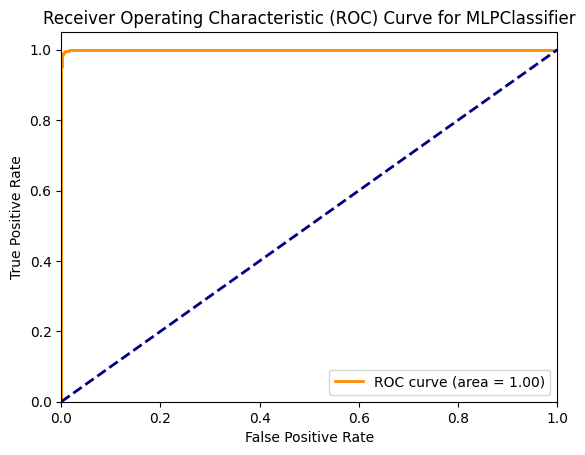

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract features and labels
X, y = mnist.data, mnist.target.astype(np.uint8)  # Convert labels to integers

# Reduce the dataset to 10% of the original dataset
X_reduced, _, y_reduced, _ = train_test_split(X, y, train_size=0.8, random_state=42)

# Split the reduced dataset into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# K-Fold Cross Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the models: Decision Tree and Neural Network
dt_model = DecisionTreeClassifier(random_state=42)
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Function to compute Accuracy
def compute_accuracy(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy for {model.__class__.__name__}: {accuracy:.4f}")

    return accuracy

# Function to compute all requested metrics (Precision, Recall, F-Measure, Confusion Matrix, ROC, AUC)
def compute_metrics(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for AUC and ROC

    # Precision
    precision = precision_score(y_test, y_pred, average='weighted')

    # Recall
    recall = recall_score(y_test, y_pred, average='weighted')

    # F-Measure
    f_measure = f1_score(y_test, y_pred, average='weighted')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Print the results
    print(f"\nPrecision for {model.__class__.__name__}: {precision:.4f}")
    print(f"Recall for {model.__class__.__name__}: {recall:.4f}")
    print(f"F-Measure for {model.__class__.__name__}: {f_measure:.4f}")
    print(f"Confusion Matrix for {model.__class__.__name__}:")
    print(cm)

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model.__class__.__name__}')
    plt.legend(loc='lower right')
    plt.show()

    return precision, recall, f_measure, cm, roc_auc

# Run for Decision Tree
print("Decision Tree Accuracy:")
dt_accuracy = compute_accuracy(dt_model, X_train, y_train, X_test, y_test)
print("\nDecision Tree Metrics:")
dt_precision, dt_recall, dt_f_measure, dt_cm, dt_roc_auc = compute_metrics(dt_model, X_train, y_train, X_test, y_test)

# Run for Neural Network
print("\nNeural Network Accuracy:")
nn_accuracy = compute_accuracy(nn_model, X_train, y_train, X_test, y_test)
print("\nNeural Network Metrics:")
nn_precision, nn_recall, nn_f_measure, nn_cm, nn_roc_auc = compute_metrics(nn_model, X_train, y_train, X_test, y_test)


Decision Tree Accuracy:
Accuracy for DecisionTreeClassifier: 0.8655

Decision Tree Metrics:

Precision for DecisionTreeClassifier: 0.8654
Recall for DecisionTreeClassifier: 0.8655
F-Measure for DecisionTreeClassifier: 0.8653
Confusion Matrix for DecisionTreeClassifier:
[[ 883    3   14    9    4   15   17    3   11    4]
 [   2 1050   10    3    4    9    2    4    8    7]
 [  12   14  782   28   18    9    9   24   17   10]
 [  10   11   37  842    4   46    5   12   29   26]
 [   6   13   11    6  837   11    8   11   13   45]
 [  15    6   10   61    3  673   24    8   25   19]
 [  16    4   12    8   16   27  840    1   18    6]
 [  10    3   25   12   16    6    0  882    6   18]
 [   7   15   29   24   15   30   19   13  736   34]
 [   5    4   12   19   40   19    4   37   16  784]]


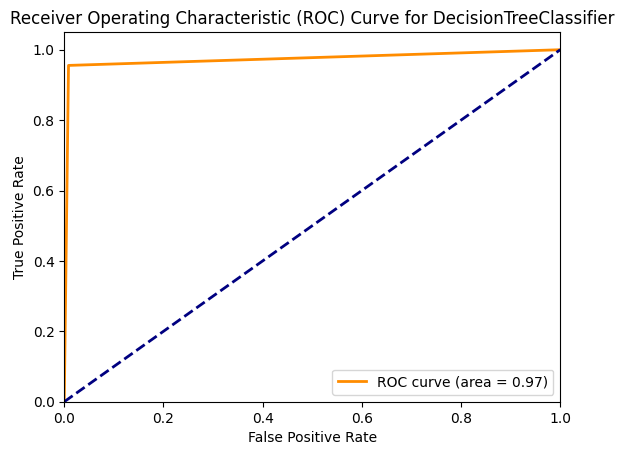


Neural Network Accuracy:
Accuracy for MLPClassifier: 0.9603

Neural Network Metrics:

Precision for MLPClassifier: 0.9604
Recall for MLPClassifier: 0.9603
F-Measure for MLPClassifier: 0.9603
Confusion Matrix for MLPClassifier:
[[ 938    0    3    1    1    3    5    0   10    2]
 [   0 1079    4    2    2    0    3    4    4    1]
 [   2    3  888    8    5    2    0    4    9    2]
 [   0    1   12  970    1   17    0    2    9   10]
 [   4    1    2    1  930    1    3    2    5   12]
 [   2    2    0   22    1  794    7    1    9    6]
 [   2    3    2    0    4    7  922    0    8    0]
 [   0    3   11    6    5    1    0  940    3    9]
 [   1    3    6   13    5   10    6    2  864   12]
 [   4    1    1    6   14    4    0    9    7  894]]


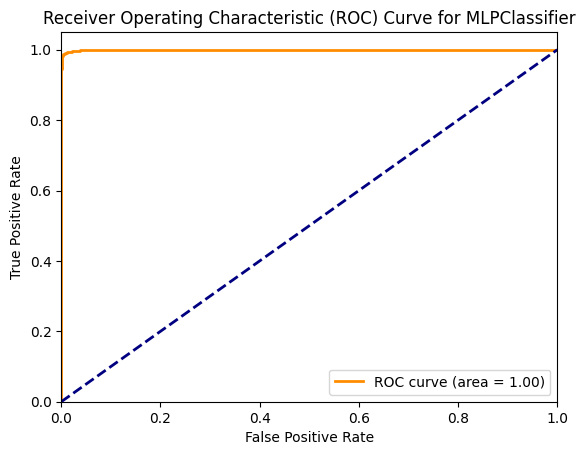

In [ ]:
import numpy as np
import struct
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Function to load MNIST data from IDX files
def load_mnist_data(image_file, label_file):
    with open(label_file, 'rb') as lbpath:
        # Read label data
        magic, num_items = struct.unpack(">II", lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(image_file, 'rb') as imgpath:
        # Read image data
        magic, num_images, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(num_images, rows * cols)

    return images, labels

train_image_file = '/content/train-images.idx3-ubyte'
train_label_file = '/content/train-labels.idx1-ubyte'
test_image_file = '/content/t10k-images.idx3-ubyte'
test_label_file = '/content/t10k-labels.idx1-ubyte'

# Load training and test data
X_train, y_train = load_mnist_data(train_image_file, train_label_file)
X_test, y_test = load_mnist_data(test_image_file, test_label_file)

# Reduce the dataset to 10% of the original dataset
X_reduced, _, y_reduced, _ = train_test_split(X_train, y_train, train_size=0.8, random_state=42)

# Split the reduced dataset into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# Initialize the models: Decision Tree and Neural Network
dt_model = DecisionTreeClassifier(random_state=42)
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Function to compute Accuracy
def compute_accuracy(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy for {model.__class__.__name__}: {accuracy:.4f}")

    return accuracy

# Function to compute all requested metrics (Precision, Recall, F-Measure, Confusion Matrix, ROC, AUC)
def compute_metrics(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for AUC and ROC

    # Precision
    precision = precision_score(y_test, y_pred, average='weighted')

    # Recall
    recall = recall_score(y_test, y_pred, average='weighted')

    # F-Measure
    f_measure = f1_score(y_test, y_pred, average='weighted')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Print the results
    print(f"\nPrecision for {model.__class__.__name__}: {precision:.4f}")
    print(f"Recall for {model.__class__.__name__}: {recall:.4f}")
    print(f"F-Measure for {model.__class__.__name__}: {f_measure:.4f}")
    print(f"Confusion Matrix for {model.__class__.__name__}:")
    print(cm)

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model.__class__.__name__}')
    plt.legend(loc='lower right')
    plt.show()

    return precision, recall, f_measure, cm, roc_auc

# Function to run for both models and print results
def run_models():
    # Run for Decision Tree
    print("Decision Tree Accuracy:")
    dt_accuracy = compute_accuracy(dt_model, X_train, y_train, X_test, y_test)
    print("\nDecision Tree Metrics:")
    dt_precision, dt_recall, dt_f_measure, dt_cm, dt_roc_auc = compute_metrics(dt_model, X_train, y_train, X_test, y_test)

    # Run for Neural Network
    print("\nNeural Network Accuracy:")
    nn_accuracy = compute_accuracy(nn_model, X_train, y_train, X_test, y_test)
    print("\nNeural Network Metrics:")
    nn_precision, nn_recall, nn_f_measure, nn_cm, nn_roc_auc = compute_metrics(nn_model, X_train, y_train, X_test, y_test)

# Execute the models
run_models()
